In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
data=pd.read_csv("anime_ratings_data.csv")
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [15]:
data.shape

(6523, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [17]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

,0
title,0
mediaType,27
eps,0
duration,275
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [20]:
df=data.copy()

In [21]:
df.isnull().sum()

,0
title,0
mediaType,27
eps,0
duration,275
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [22]:
df1=df.copy()

In [24]:
df1.mediaType.fillna("Other",inplace=True)

In [25]:
df1["duration"] = df1["duration"].fillna( value=df1.groupby (["genre", "mediaType"]) ["duration"].transform("median") )

In [26]:
df1["votes"] = df1["votes"].fillna( value=df1.groupby (["genre", "mediaType"]) ["votes"].transform("median") )

In [27]:
df1.isnull().sum()

,0
title,0
mediaType,0
eps,0
duration,8
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [29]:
df1["duration"] = df1 ["duration"].fillna( value=df1.groupby (["genre"]) ["duration"].transform("median") )

In [30]:
df1.isnull().sum()

,0
title,0
mediaType,0
eps,0
duration,0
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [33]:
df1["years_running"] = df1["finishYr"]- df1["startYr"]
df1.drop(["startYr", "finishYr"], axis=1, inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


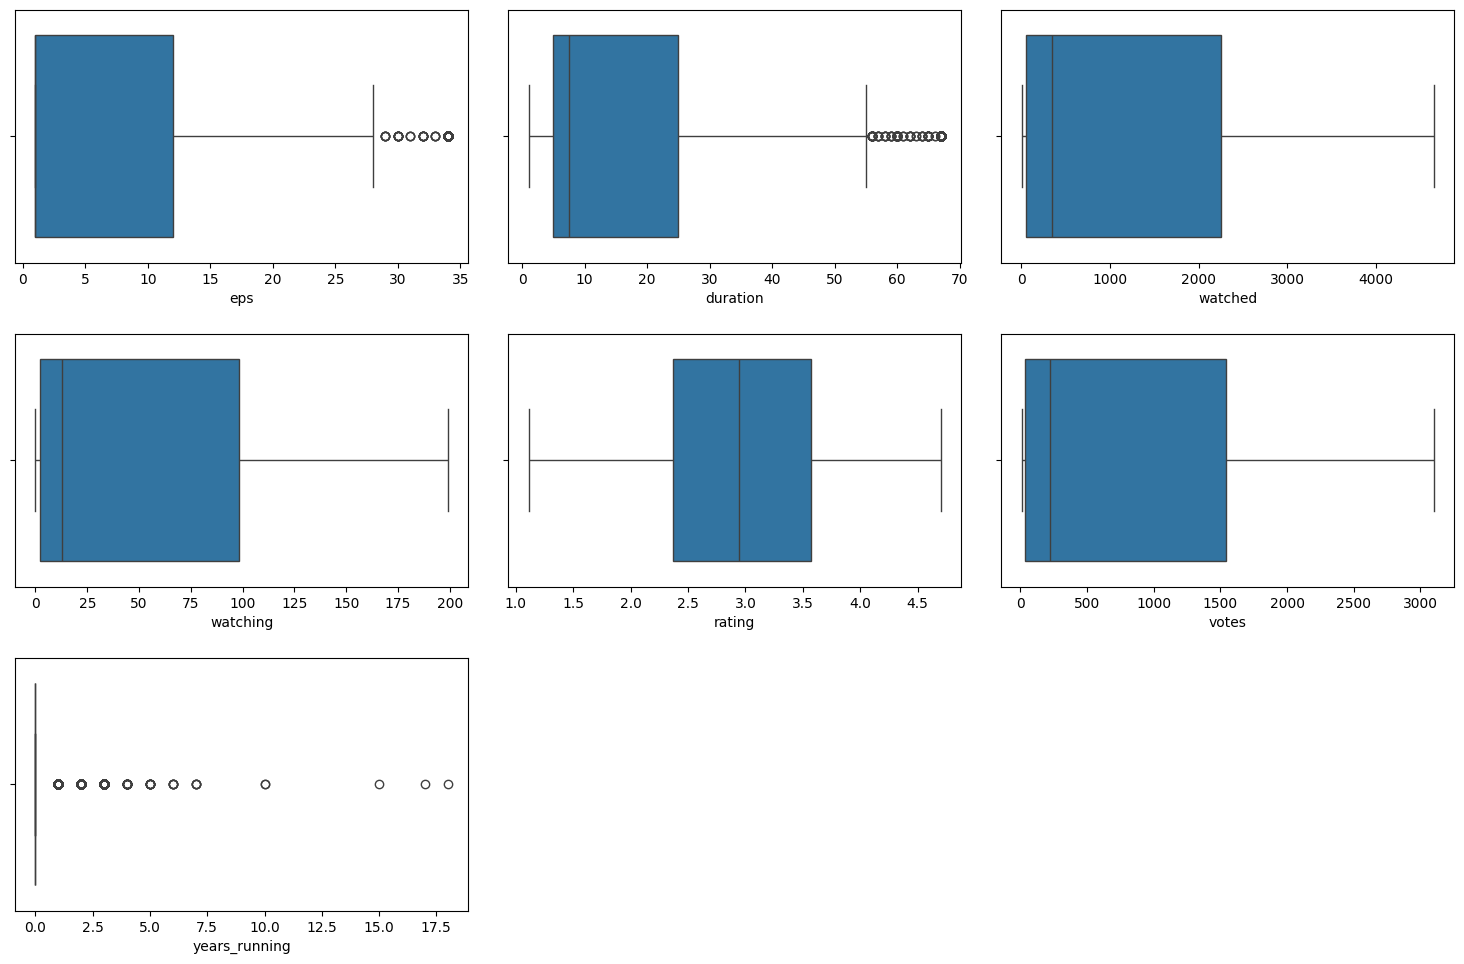

In [35]:
num_cols= df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=df1, x=variable)
  plt.tight_layout(pad=2)
plt.show()

In [36]:
df1.drop(["title","description"], axis=1, inplace=True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


In [37]:
df2=df1.copy()

In [39]:
x = df2.drop(["rating"], axis=1)
y = df2["rating"]

In [41]:
x = sm.add_constant(x)

In [44]:
x = pd.get_dummies( x, columns =x.select_dtypes (include=["object", "category"]).columns.tolist(), drop_first=True )
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,contentWarn_Yes,studio_primary_J.C. Staff,studio_primary_MADHOUSE,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [45]:
x=x.astype(float)
x.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,contentWarn_Yes,studio_primary_J.C. Staff,studio_primary_MADHOUSE,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1)
print("Number of rows in train data", x_train.shape[0])
print("Number of rows in test data=" , x_test.shape[0])

Number of rows in train data 4566
Number of rows in test data= 1957


In [47]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:18:21   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [48]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression (model, predictors, target):
  pred = model.predict(predictors)
  r2 = r2_score (target, pred)
  rmse = np.sqrt(mean_squared_error(target, pred))
  mae = mean_absolute_error(target, pred)
  df_perf = pd.DataFrame( { "RMSE": rmse, "MAE": mae, "R-squared": r2,}, index=[0])
  return df_perf

In [49]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression (olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared
0,0.40112,0.330417,0.722387


In [50]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression (olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared
0,0.413096,0.340426,0.703053


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
  vif = pd.DataFrame()
  vif["feature"] = predictors.columns
  # calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
  return vif
checking_vif(x_train).sort_values('VIF', ascending=False)

,feature,VIF
0,const,152.488126
5,votes,79.580182
3,watched,68.407244
31,genre_Other,11.591914
18,studio_primary_Others,11.131121
11,mediaType_TV,6.998184
4,watching,4.997799
26,genre_Adventure,4.197895
7,mediaType_Movie,4.062291
24,studio_primary_Toei Animation,3.983035


In [54]:
def treating_multicollinearity (predictors, target, high_vif_columns):
  # empty lists to store adj. R-squared and RMSE values
   adj_r2 = []
   rmse = []
   # build ols models by dropping one of the high VIF columns at a time
   # store the adjusted R-squared and RMSE in the lists defined previously
   for cols in high_vif_columns:
    train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
    olsmodel = sm.OLS (target, train).fit()
    adj_r2.append(olsmodel.rsquared_adj)
    rmse.append(np.sqrt(olsmodel.mse_resid))
   temp = pd.DataFrame( {
      "col": high_vif_columns,
      "Adj. R-squared after_dropping col": adj_r2,
      "RMSE after dropping col": rmse, } ).sort_values (by="Adj. R-squared after_dropping col", ascending=False)
   temp.reset_index(drop=True, inplace=True)
   return temp


In [55]:
col_list = ["watched", "votes"]
res = treating_multicollinearity (x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,votes,0.716994,0.405042
1,watched,0.707967,0.411451


In [56]:
col_to_drop = "votes"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping votes


,feature,VIF
0,const,152.249342
1,eps,3.873093
2,duration,2.752030
3,watched,3.235392
4,watching,4.154724
5,years_running,1.272523
6,mediaType_Movie,4.060078
7,mediaType_Music Video,2.408173
8,mediaType_OVA,3.049085
9,mediaType_Other,1.729382


In [57]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:34:46   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [58]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()
max_p_value = 1
while len(cols) > 0:
  x_train_aux = predictors[cols]
  model = sm.OLS(y_train, x_train_aux).fit()
  p_values = model.pvalues
  max_p_value = max(p_values)
  feature_with_p_max= p_values.idxmax()
  if max_p_value > 0.05:
    cols.remove(feature_with_p_max)
  else:
    break
selected_features = cols
print(selected_features)

['const', 'eps', 'duration', 'watched', 'watching', 'years_running', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_Toei Animation', 'genre_Adventure', 'genre_Comedy', 'genre_Drama']


In [59]:
x_train3= x_train2 [selected_features]
x_test3 = x_test2[selected_features]

In [61]:
olsmod2= sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:38:48   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [62]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression (olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared
0,0.40399,0.33291,0.7184


In [63]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression (olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared
0,0.414583,0.341345,0.700912


In [64]:
df_pred= pd.DataFrame()
df_pred["Actual Values"] = y_train
df_pred ["Fitted Values"] = olsmod2.fittedvalues
df_pred ["Residuals"] = olsmod2.resid
df_pred.head()

,Actual Values,Fitted Values,Residuals
5432,2.872,2.795321,0.076679
5326,2.766,2.275887,0.490113
1021,4.049,4.446845,-0.397845
836,3.153,3.176604,-0.023604
1396,2.167,2.265921,-0.098921


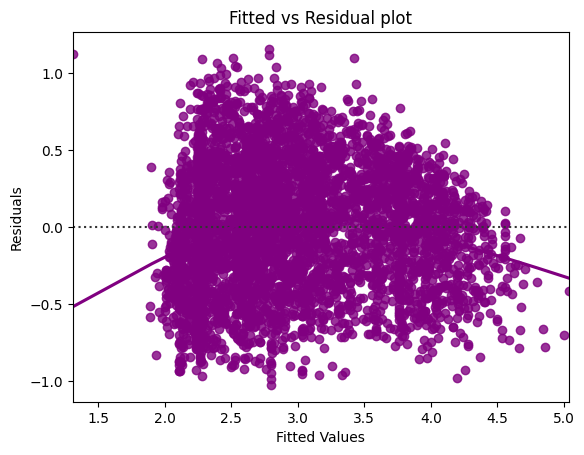

In [65]:
sns.residplot( data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess = True )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

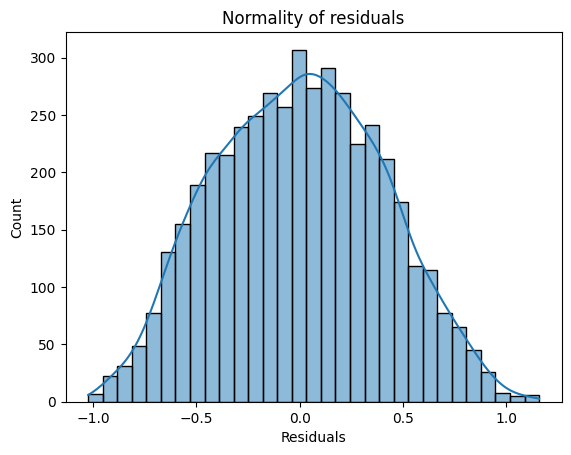

In [66]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

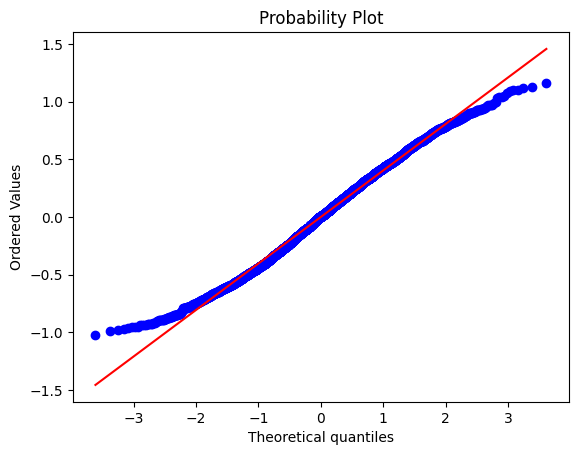

In [67]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred ["Residuals"], dist="norm", plot=pylab)
plt.show()

In [68]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9934861541214798, pvalue=1.4491597314180578e-13)

In [69]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt (df_pred ["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.048458241344956), ('p-value', 0.130479678454497)]

In [70]:
pred= olsmod2.predict(x_test3)
df_pred_test = pd. DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2023,2.039,2.262980
4543,3.236,3.784680
1914,2.314,2.323405
4856,2.457,2.176779
4405,2.322,2.331494
5755,4.344,3.928340
2341,2.858,2.279015
1637,3.976,3.879616
5730,3.728,3.588967
1385,2.692,2.420355


In [71]:
x_train_final= x_train3.copy()
x_test_final =x_test3.copy()
olsmodel_final= sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:51:45   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         